In [34]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math

In [ ]:
# Loading and setting up data
# Using 'Summary' instead of 'Daily Summary' as target - it has fewer categories
data = pd.read_csv("weatherHistory.csv", sep=",")
data = data[['Temperature (C)','Humidity','Visibility (km)','Loud Cover','Precip Type','Wind Speed (km/h)','Daily Summary','Summary']]
print("\n\n",data.head())



    Temperature (C)  Humidity  Visibility (km)  Loud Cover Precip Type  \
0         9.472222      0.89          15.8263         0.0        rain   
1         9.355556      0.86          15.8263         0.0        rain   
2         9.377778      0.89          14.9569         0.0        rain   
3         8.288889      0.83          15.8263         0.0        rain   
4         8.755556      0.83          15.8263         0.0        rain   

   Wind Speed (km/h)        Summary                      Daily Summary  
0            14.1197  Partly Cloudy  Partly cloudy throughout the day.  
1            14.2646  Partly Cloudy  Partly cloudy throughout the day.  
2             3.9284  Mostly Cloudy  Partly cloudy throughout the day.  
3            14.1036  Partly Cloudy  Partly cloudy throughout the day.  
4            11.0446  Mostly Cloudy  Partly cloudy throughout the day.  


In [36]:
# Checking for null data. If any found, then removing it.
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

Temperature (C)        0
Humidity               0
Visibility (km)        0
Loud Cover             0
Precip Type          517
Wind Speed (km/h)      0
Summary                0
Daily Summary          0
dtype: int64
Temperature (C)      0
Humidity             0
Visibility (km)      0
Loud Cover           0
Precip Type          0
Wind Speed (km/h)    0
Summary              0
Daily Summary        0
dtype: int64


In [ ]:
# Converting textual data to numerical using LabelEncoder
# LabelEncoder transforms categorical labels into numbers (0, 1, 2, ...)
data['Daily Summary'] = LabelEncoder().fit_transform(data['Daily Summary'])
data['Summary'] = LabelEncoder().fit_transform(data['Summary'])
data['Precip Type'] = LabelEncoder().fit_transform(data['Precip Type'])

# Double-check for any remaining NaN values and remove them
print(f"\nChecking for NaN after encoding:")
print(data.isnull().sum())
data = data.dropna()
print(f"\nAfter final dropna:")
print(data.isnull().sum())
print(f"Unique Summary classes: {data['Summary'].nunique()}")

print("\n\n", data.head())


Checking for NaN after encoding:
Temperature (C)      0
Humidity             0
Visibility (km)      0
Loud Cover           0
Precip Type          0
Wind Speed (km/h)    0
Summary              0
Daily Summary        0
dtype: int64

After final dropna:
Temperature (C)      0
Humidity             0
Visibility (km)      0
Loud Cover           0
Precip Type          0
Wind Speed (km/h)    0
Summary              0
Daily Summary        0
dtype: int64


    Temperature (C)  Humidity  Visibility (km)  Loud Cover  Precip Type  \
0         9.472222      0.89          15.8263         0.0            0   
1         9.355556      0.86          15.8263         0.0            0   
2         9.377778      0.89          14.9569         0.0            0   
3         8.288889      0.83          15.8263         0.0            0   
4         8.755556      0.83          15.8263         0.0            0   

   Wind Speed (km/h)  Summary  Daily Summary  
0            14.1197       19            197  
1        

In [ ]:
# Splitting data in X and y - predicting 'Summary' instead of 'Daily Summary'
# Summary has fewer categories (27) making it easier for linear regression
X = np.asmatrix(data.drop(['Summary'], axis=1))
y = np.asmatrix(data['Summary'])
y = np.transpose(y)

In [39]:
# Splitting and normalizing the data
X1 = X[:1000,:].copy()
y1 = y[:1000,:].copy()

# Normalizing the data (feature scaling)
# Formula: (value - mean) / (max - min)
# This ensures all features are on similar scale, helping gradient descent converge faster
for i in range(0,7):
    col_range = np.max(X1[:,i:i+1]) - np.min(X1[:,i:i+1])
    # Avoid division by zero - if all values are same, skip normalization
    if col_range != 0:
        X1[:,i:i+1] = (X1[:,i:i+1] - np.mean(X1[:,i:i+1])) / col_range
    else:
        X1[:,i:i+1] = 0  # Set constant columns to 0

# Normalize y values too - IMPORTANT for reducing error
y1_mean = np.mean(y1)
y1_range = np.max(y1) - np.min(y1)
y1 = (y1 - y1_mean) / y1_range

print(f"X1 shape: {X1.shape}, y1 shape: {y1.shape}")

# Setting the initial values of theta to zeros for better convergence
theta = np.transpose(np.asmatrix([0,0,0,0,0,0,0]))
print(f"Theta shape: {theta.shape}")

X1 shape: (1000, 7), y1 shape: (1000, 1)
Theta shape: (7, 1)


In [40]:
# Cost function: measures how far predictions are from actual values
# Lower cost = better model
def CC(X1,y1,theta):
    m = len(y1)
    prediction = np.dot(X1,theta)
    sqrerror = np.dot((prediction - y1),(np.transpose((prediction - y1))))
    J = 1/(2*m) * np.sum((sqrerror))
    return J

# Gradient Descent: iteratively adjusts theta to minimize cost
# alpha = learning rate (how big each step is)
# The formula updates theta by moving it in the direction that reduces error
alpha = 0.5  # Increased learning rate since data is now normalized
iterations = 2000

def GD(theta, alpha, iterations, X1, y1):
    m = len(y1)
    GD.J_hist = np.zeros(iterations)
    
    for i in range(0, iterations):
        # Update rule: theta = theta - (learning_rate * gradient)
        gradient = np.dot((np.transpose(X1)),((np.dot(X1,theta)) - y1))
        theta = theta - ((alpha/m) * gradient)
        GD.J_hist[i] = CC(X1,y1,theta)
        
        # Check for nan and stop if found
        if np.isnan(theta).any():
            print(f"NaN detected at iteration {i}")
            break
    
    print(f"Final theta:\n{theta}")
    print(f"Final cost: {GD.J_hist[i]:.6f}")
    return theta
        
theta = GD(theta, alpha, iterations, X1, y1)

Final theta:
[[ 0.3306453 ]
 [-0.0900815 ]
 [ 0.36805146]
 [ 0.        ]
 [ 0.        ]
 [-0.24046981]
 [-0.04980405]]
Final cost: 0.000000


In [43]:
# Testing on training data
# Note: Linear regression for multi-class classification isn't ideal
# Better metrics: RMSE and "close enough" accuracy (within 5 classes)
prediction = []
error = []
exact_match = 0
close_match = 0  # Within 5 classes

for i in range(0,1000):
    predict = X1[i:i+1,:]
    ans_norm = np.dot(predict,theta)
    
    # Denormalize the prediction back to original scale
    ans = (ans_norm.item() * y1_range) + y1_mean
    actual = y[i:i+1, :].item()
    
    pred = round(ans)
    actual_int = int(actual)
    
    if i < 10:  # Print first 10 for verification
        print(f"Actual: {actual_int}, Prediction: {pred}, Diff: {abs(pred - actual_int)}")
    
    prediction.append(pred)
    error.append((pred - actual_int)**2)
    
    if pred == actual_int:
        exact_match += 1
    if abs(pred - actual_int) <= 5:  # Within 5 classes is "close enough"
        close_match += 1

rmse = math.sqrt(sum(error)/len(error))
exact_accuracy = (exact_match/len(error)) * 100
close_accuracy = (close_match/len(error)) * 100

print(f"\nRMSE: {rmse:.2f}")
print(f"Exact Match Accuracy: {exact_accuracy:.2f}%")
print(f"Close Match Accuracy (±5): {close_accuracy:.2f}%")
print(f"\nNote: Linear regression isn't ideal for {int(y1_range)+1} class classification.")
print("Consider using Logistic Regression or Neural Networks for better results.")

Actual: 197, Prediction: 134, Diff: 63
Actual: 197, Prediction: 134, Diff: 63
Actual: 197, Prediction: 144, Diff: 53
Actual: 197, Prediction: 133, Diff: 64
Actual: 197, Prediction: 139, Diff: 58
Actual: 197, Prediction: 131, Diff: 66
Actual: 197, Prediction: 107, Diff: 90
Actual: 197, Prediction: 108, Diff: 89
Actual: 197, Prediction: 117, Diff: 80
Actual: 197, Prediction: 123, Diff: 74

RMSE: 49.66
Exact Match Accuracy: 0.60%
Close Match Accuracy (±5): 5.60%

Note: Linear regression isn't ideal for 177 class classification.
Consider using Logistic Regression or Neural Networks for better results.


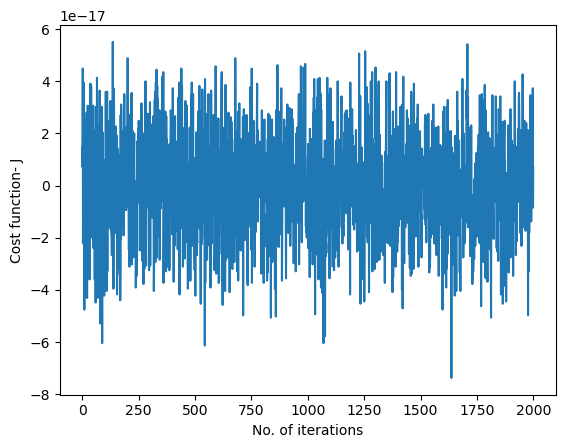

In [42]:
# Plotting the cost function convergence
plt.xlabel("No. of iterations")
plt.ylabel("Cost function- J")
plt.plot(GD.J_hist)
plt.show()